In [10]:
import os

import sys
sys.path.append('../huhola/')
from microtopography import HuHoLa

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 12 05:00:16 2023

@author: kono0001
"""

import pandas as pd
pd.set_option('display.max_columns', None)
extract_point_from_raster = HuHoLa.extract_point_from_raster
perform_linear_regression = HuHoLa.perform_linear_regression
convert_raster_units_m_cm = HuHoLa.convert_raster_units_m_cm

# First, let's calculate the hol_hum_hei_dep layer with fix_flats

In [12]:
#Creating variables...
working_dir = "D:/For_Nils/Temp_tests/HuHola_outputs/WTD"
wd_0 = os.path.join(working_dir, "Microtopo_50cm_000")
if not os.path.isdir(wd_0):
    os.mkdir(wd_0)
path_dem = r"D:\For_Nils\data\Degfert_DEM.tif" #r"D:\For_Nils\data\Degfert_DEM.tif"
path_wbt = "C:/Users/kono0001/WhiteboxTools_win_amd64/WBT"

In [86]:
# Creating an instance of HuHoLa
m = HuHoLa(path_wbt = path_wbt,
           wd = wd_0,
           fix_flats = True,
           flat_increment = 0.001,#0.0001
           path_dem = path_dem)

changing the number_classes to 3 because threshold_fill is 0.0 and 3 classes and 5 classes are the same


In [87]:
# print(m.p_dem)

In [88]:
# Running the microtopography model
m.generate_microtopography()

Nodata value found in the original data: 0.0
Fill 1: ...DEM...
.\whitebox_tools.exe --run="FillDepressionsWangAndLiu" --wd="/Users/johnlindsay/Downloads/\" --dem='D:/For_Nils/Temp_tests/HuHola_outputs/WTD\Microtopo_50cm_000\DEM_prep.tif' --output='D:/For_Nils/Temp_tests/HuHola_outputs/WTD\Microtopo_50cm_000\DEM_filled.tif' --fix_flats --flat_increment='0.001' -v --compress_rasters=False

****************************************
* Welcome to FillDepressionsWangAndLiu *
* Powered by WhiteboxTools             *
* www.whiteboxgeo.com                  *
****************************************
Reading data...
progress: 0%
progress: 1%
progress: 2%
progress: 3%
progress: 4%
progress: 5%
progress: 6%
progress: 7%
progress: 8%
progress: 9%
progress: 10%
progress: 11%
progress: 12%
progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progre

In [89]:
# This cell is temporary. TO be commented out after testing...
# m.level(wd_0)
# path_to_wtd_proxy_m = os.path.join(wd_0, "level.tif")
# path_to_wtd_proxy = os.path.join(wd_0, "level_cm.tif")

# convert_raster_units_m_cm(path_to_wtd_proxy_m, path_to_wtd_proxy)

In [90]:
path_to_wtd_proxy_m = os.path.join(wd_0, "hol_hum_depth_height.tif")
path_to_wtd_proxy = os.path.join(wd_0, "hol_hum_depth_height_cm.tif")

convert_raster_units_m_cm(path_to_wtd_proxy_m, path_to_wtd_proxy)

In [91]:
 path_to_wtd_proxy

'D:/For_Nils/Temp_tests/HuHola_outputs/WTD\\Microtopo_50cm_000\\hol_hum_depth_height_cm.tif'

# Now, let's extract WTD_proxy and perform some linear regression

In [92]:
"""
Variables:
"""
#out_dir = "D:/For_Nils/Temp_tests/HuHola_outputs/WTD/"
path_to_shape_halm = r"C:\BRAVE\slu\MyPhD\WTD_modelling_simple\Data\Shapefiles\halmyran_wat.shp"

path_to_shape_hals = r"C:\BRAVE\slu\MyPhD\WTD_modelling_simple\Data\Shapefiles\halsingfors_wat.shp"
path_to_shape_sto = r"C:\BRAVE\slu\MyPhD\WTD_modelling_simple\Data\Shapefiles\stortjarn_wat.shp"
path_to_shape_deg = r"C:\BRAVE\slu\MyPhD\WTD_modelling_simple\Data\Shapefiles\degero_wat.shp"

path_to_manual_WTD = r"C:\BRAVE\slu\MyPhD\WTD_modelling_simple\Data\Manual_WTD\Manual water table measurements.xlsx"

In [93]:

"""
Instantiating the class for calculating hummock heights and hollow depths named level
"""
#calc = Wtd_Calc(path_to_hum, path_to_hol, out_dir)
#calc.level()

'\nInstantiating the class for calculating hummock heights and hollow depths named level\n'

In [94]:
"""
extracting the WTD_proxy for each of the ground truth points
"""
sto_points = extract_point_from_raster(path_to_raster = path_to_wtd_proxy,
                                       path_to_shapefile=path_to_shape_sto,
                                       colname_output="WTD_proxy")
sto_points['tube'] = list(range(1,5))

halm_points = extract_point_from_raster(path_to_raster = path_to_wtd_proxy,
                                       path_to_shapefile=path_to_shape_halm,
                                       colname_output="WTD_proxy")
halm_points['tube'] = list(range(1,5))

hals_points = extract_point_from_raster(path_to_raster = path_to_wtd_proxy,
                                       path_to_shapefile=path_to_shape_hals,
                                       colname_output="WTD_proxy")
hals_points['tube'] = list(range(1,5))

deg_points = extract_point_from_raster(path_to_raster = path_to_wtd_proxy,
                                       path_to_shapefile=path_to_shape_deg,
                                       colname_output="WTD_proxy")

In [95]:
#Manual 
path_to_excel = path_to_manual_WTD
sto_wat = pd.read_excel(path_to_excel, sheet_name="Stortjärn")
sto_wat = sto_wat.rename(columns={'Tube number': 'tube'})

halm_wat = pd.read_excel(path_to_excel, sheet_name="Hålmyran")
halm_wat = halm_wat.rename(columns={'Tube number': 'tube'})

hals_wat = pd.read_excel(path_to_excel, sheet_name="Hälsingfors")
hals_wat = hals_wat.rename(columns={'Tube number': 'tube'})

deg_wat = pd.read_excel(path_to_excel, sheet_name="Degero")
deg_wat = deg_wat.rename(columns={'Tube number': 'tube'})

In [96]:
####Calcilating the MEAN Measured WTD by group
sto_avg = sto_wat.groupby('tube').mean('WTD').reset_index()
sto_avg['WTD'] = sto_avg['WTD'].transform(lambda x: -x)

halm_avg = halm_wat.groupby('tube').mean('WTD').reset_index()
halm_avg['WTD'] = halm_avg['WTD'].transform(lambda x: -x)

hals_avg =  hals_wat.groupby('tube').mean('WTD').reset_index()
hals_avg['WTD'] = hals_avg['WTD'].transform(lambda x: -x)

deg_avg =  deg_wat.groupby('tube').mean('WTD').reset_index()
deg_avg['WTD'] = deg_avg['WTD'].transform(lambda x: -x)

In [97]:
##Merging the 2 dataframes containing the measured average WTD with the WTD_proxy
halm = pd.concat([halm_points, halm_avg], axis = 1, join='inner').T.drop_duplicates().T
hals = pd.concat([hals_points, hals_avg], axis = 1, join='inner').T.drop_duplicates().T
sto = pd.concat([sto_points, sto_avg], axis = 1, join='inner').T.drop_duplicates().T
deg = deg_points.merge(deg_avg, left_on='tube', right_on='tube')

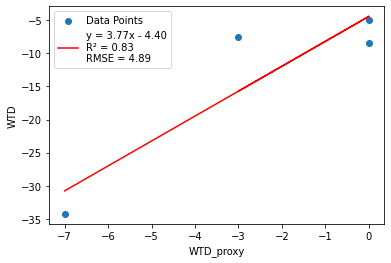

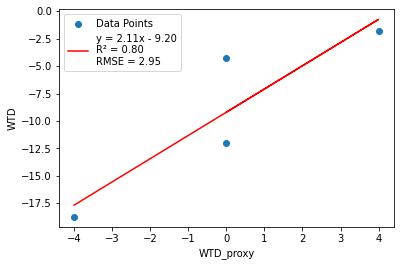

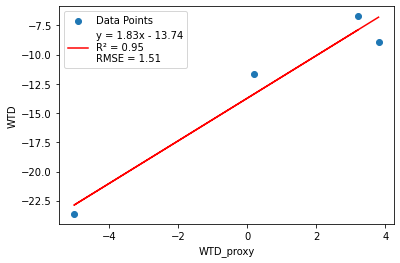

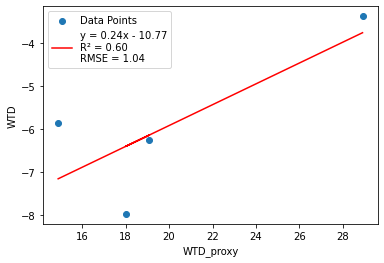

In [98]:
##Linear regression
perform_linear_regression(halm, 'WTD_proxy', 'WTD')
perform_linear_regression(hals, 'WTD_proxy', 'WTD')
perform_linear_regression(sto, 'WTD_proxy', 'WTD')
perform_linear_regression(deg, 'WTD_proxy', 'WTD')

In [99]:
deg

,GPS Number,North,East,Elevation,Name,Project,Site,Person res,Notes,tube,geometry,WTD_proxy,WTD
0,50,7125263.188,721315.774,265.751,Water Table Level Pit 2,ICOS,Deger� Storymyran,Per Marklund,None,2,POINT (721315.774 7125263.188),14.898046,-5.853494
1,65,7125174.670,721245.660,265.913,Water Table Level Pit 4,ICOS,Deger� Storymyran,Per Marklund,None,4,POINT (721245.660 7125174.670),19.099512,-6.242337
2,79,7125190.210,721320.633,265.929,Water Table Level Pit 1,ICOS,Deger� Storymyran,Per Marklund,None,1,POINT (721320.633 7125190.210),18.001465,-7.972308
3,130,7125321.369,721252.454,265.606,Water Table Level Pit 3,ICOS,Deger� Storymyran,Per Marklund,None,3,POINT (721252.454 7125321.369),28.900490,-3.375325


In [100]:
csv_dir = r"D:\For_Nils\Temp_tests\HuHola_outputs\WTD\WTD_CSV_50"
halm.to_csv(os.path.join(csv_dir, "halm.csv"))
hals.to_csv(os.path.join(csv_dir, "hals.csv"))
sto.to_csv(os.path.join(csv_dir, "sto.csv"))
deg.to_csv(os.path.join(csv_dir, "deg.csv"))